In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

## Importamos los datos necesarios y motramos los ultimos datos de las 16 comunas

In [138]:
url          = "https://raw.githubusercontent.com/elaval/covid_chile_regional/master/coronavirus_data_chile_regions.tsv"
data         = pd.read_csv(url, sep='\t')
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data.tail(16)

,date,location,new_cases,total_cases,new_deaths,total_deaths
640,2020-04-12,Arica y Parinacota,8,115,1,1
641,2020-04-12,Tarapacá,8,46,0,0
642,2020-04-12,Antofagasta,21,138,0,1
643,2020-04-12,Atacama,0,13,0,0
644,2020-04-12,Coquimbo,2,66,0,0
645,2020-04-12,Valparaíso,6,254,0,2
646,2020-04-12,Metropolitana,151,3599,3,35
647,2020-04-12,O'Higgins,1,46,0,0
648,2020-04-12,Maule,4,138,0,3
649,2020-04-12,Ñuble,7,613,1,7


## Total de casos contagiados

In [139]:
total_casos_chile   = data['new_cases'].sum()
total_casos_chile

7212

## Total de casos por región

In [140]:
suma_total_casos_region = data.groupby(['location'])['new_cases'].sum()
suma_total_casos_region

location
Antofagasta            138
Araucanía              775
Arica y Parinacota     115
Atacama                 13
Aysén                    7
Biobío                 500
Coquimbo                66
Los Lagos              372
Los Ríos               135
Magallanes             396
Maule                  138
Metropolitana         3598
O'Higgins               46
Tarapacá                46
Valparaíso             254
Ñuble                  613
Name: new_cases, dtype: int64

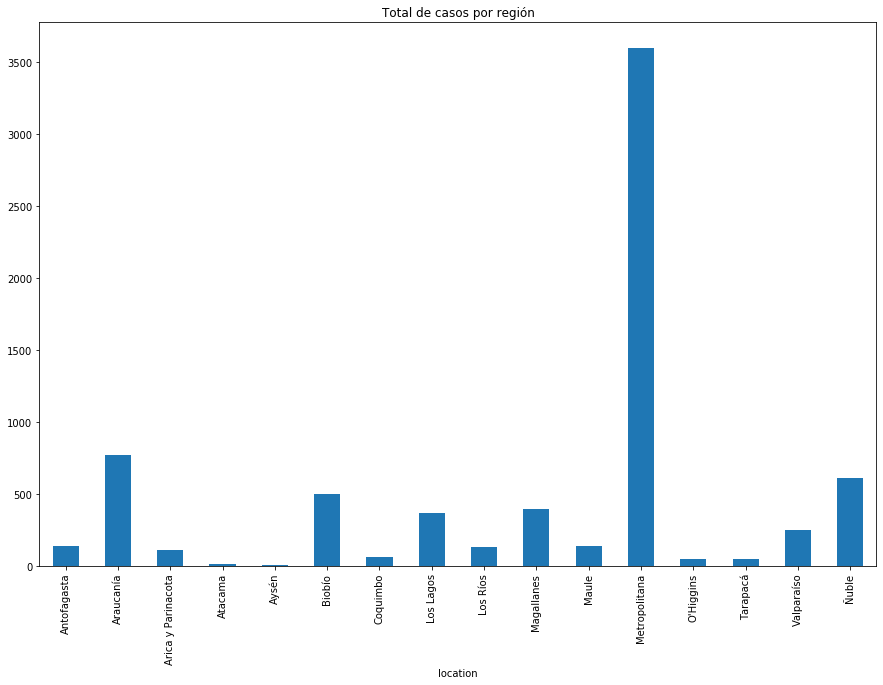

In [141]:
suma_total_casos_region.plot(kind='bar', title = 'Total de casos por región')

##  Avances Coronavirus Por Fecha

In [142]:
avance_por_fecha_chile = data.groupby(['date'])['total_cases'].sum()
avance_por_fecha_chile

date
2020-03-03       1
2020-03-04       2
2020-03-05       4
2020-03-06       5
2020-03-07       7
2020-03-08      10
2020-03-09      13
2020-03-10      17
2020-03-11      23
2020-03-12      33
2020-03-13      43
2020-03-14      61
2020-03-15      75
2020-03-16     156
2020-03-17     201
2020-03-18     238
2020-03-19     342
2020-03-20     434
2020-03-21     537
2020-03-22     632
2020-03-23     746
2020-03-24     922
2020-03-25    1142
2020-03-26    1306
2020-03-27    1610
2020-03-28    1909
2020-03-29    2139
2020-03-30    2449
2020-03-31    2738
2020-04-01    3031
2020-04-02    3404
2020-04-03    3737
2020-04-04    4161
2020-04-05    4471
2020-04-06    4815
2020-04-07    5116
2020-04-08    5546
2020-04-09    5972
2020-04-10    6501
2020-04-11    6927
2020-04-12    7213
Name: total_cases, dtype: int64

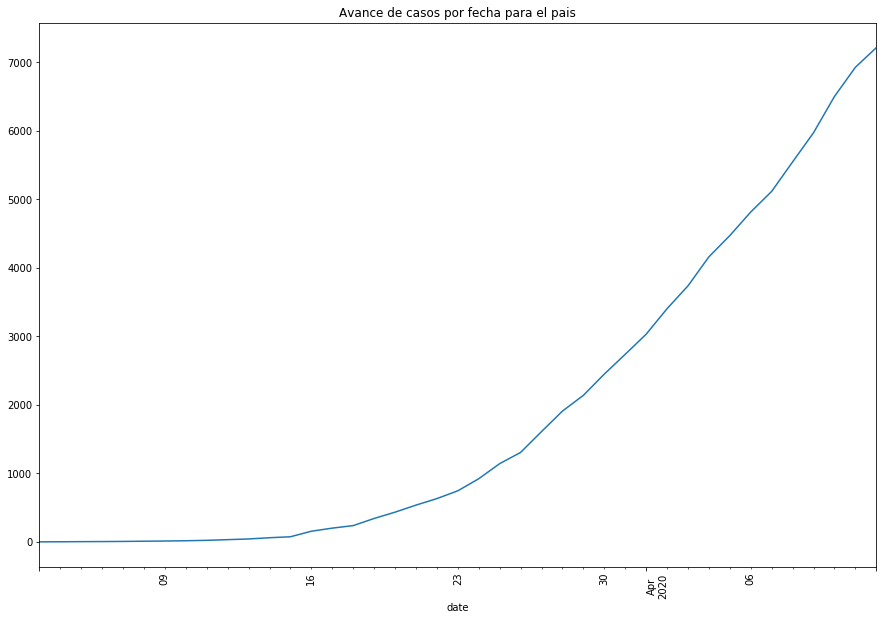

In [143]:
avance_por_fecha_chile.plot(kind='line', title = 'Avance de casos por fecha para el pais', rot=90)

## Avance fecha por región 

In [144]:
avance_por_fecha_region         = data.groupby(['date', 'location'], as_index=False)['total_cases'].sum()

In [145]:
def getGraphandList(name_region):
    region           = avance_por_fecha_region.loc[avance_por_fecha_region['location'] == name_region]
    title            = "Curva de crecimiento - " + str(name_region)
    xtick            = np.array(region['date'])
    ytick            = np.array(region['total_cases']) 
    region.plot(kind = 'line', title = title, rot=90, x='date', y='total_cases', grid=True)
    print(region)
    

          date            location  total_cases
2   2020-03-03  Arica y Parinacota            0
18  2020-03-04  Arica y Parinacota            0
34  2020-03-05  Arica y Parinacota            0
50  2020-03-06  Arica y Parinacota            0
66  2020-03-07  Arica y Parinacota            0
82  2020-03-08  Arica y Parinacota            0
98  2020-03-09  Arica y Parinacota            0
114 2020-03-10  Arica y Parinacota            0
130 2020-03-11  Arica y Parinacota            0
146 2020-03-12  Arica y Parinacota            0
162 2020-03-13  Arica y Parinacota            0
178 2020-03-14  Arica y Parinacota            0
194 2020-03-15  Arica y Parinacota            0
210 2020-03-16  Arica y Parinacota            0
226 2020-03-17  Arica y Parinacota            0
242 2020-03-18  Arica y Parinacota            0
258 2020-03-19  Arica y Parinacota            1
274 2020-03-20  Arica y Parinacota            1
290 2020-03-21  Arica y Parinacota            1
306 2020-03-22  Arica y Parinacota      

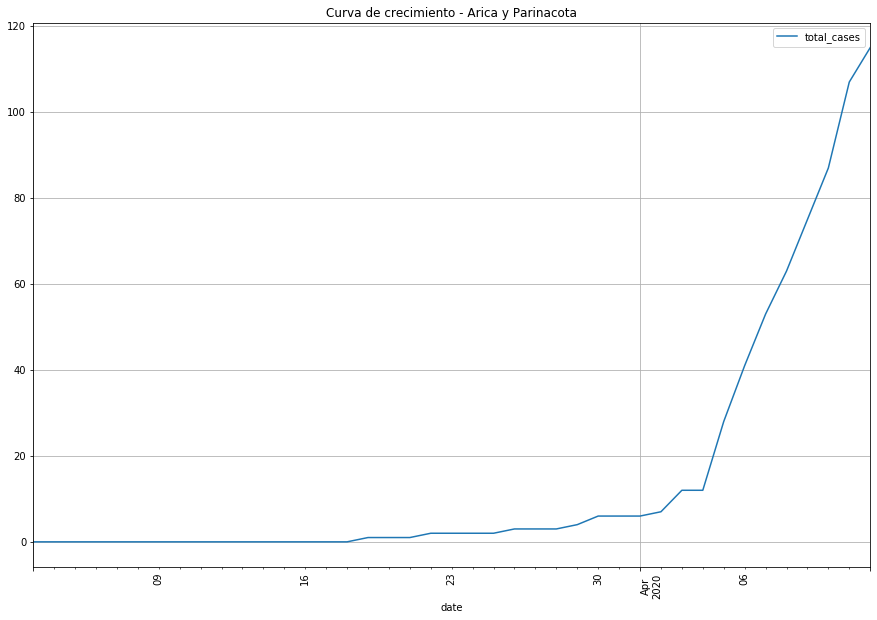

In [146]:
getGraphandList("Arica y Parinacota")

          date  location  total_cases
13  2020-03-03  Tarapacá            0
29  2020-03-04  Tarapacá            0
45  2020-03-05  Tarapacá            0
61  2020-03-06  Tarapacá            0
77  2020-03-07  Tarapacá            0
93  2020-03-08  Tarapacá            0
109 2020-03-09  Tarapacá            0
125 2020-03-10  Tarapacá            0
141 2020-03-11  Tarapacá            0
157 2020-03-12  Tarapacá            0
173 2020-03-13  Tarapacá            0
189 2020-03-14  Tarapacá            0
205 2020-03-15  Tarapacá            0
221 2020-03-16  Tarapacá            0
237 2020-03-17  Tarapacá            0
253 2020-03-18  Tarapacá            0
269 2020-03-19  Tarapacá            0
285 2020-03-20  Tarapacá            0
301 2020-03-21  Tarapacá            0
317 2020-03-22  Tarapacá            0
333 2020-03-23  Tarapacá            1
349 2020-03-24  Tarapacá            4
365 2020-03-25  Tarapacá            4
381 2020-03-26  Tarapacá            5
397 2020-03-27  Tarapacá            5
413 2020-03-

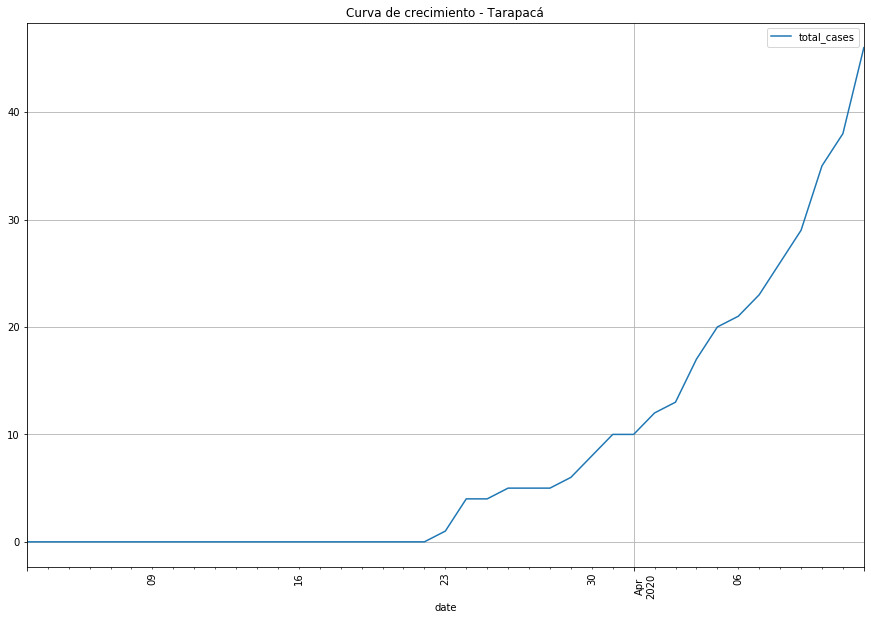

In [147]:
getGraphandList("Tarapacá")

          date     location  total_cases
0   2020-03-03  Antofagasta            0
16  2020-03-04  Antofagasta            0
32  2020-03-05  Antofagasta            0
48  2020-03-06  Antofagasta            0
64  2020-03-07  Antofagasta            0
80  2020-03-08  Antofagasta            0
96  2020-03-09  Antofagasta            0
112 2020-03-10  Antofagasta            0
128 2020-03-11  Antofagasta            0
144 2020-03-12  Antofagasta            0
160 2020-03-13  Antofagasta            0
176 2020-03-14  Antofagasta            2
192 2020-03-15  Antofagasta            2
208 2020-03-16  Antofagasta            2
224 2020-03-17  Antofagasta            2
240 2020-03-18  Antofagasta            2
256 2020-03-19  Antofagasta            2
272 2020-03-20  Antofagasta            6
288 2020-03-21  Antofagasta           10
304 2020-03-22  Antofagasta           11
320 2020-03-23  Antofagasta           11
336 2020-03-24  Antofagasta           13
352 2020-03-25  Antofagasta           19
368 2020-03-26  

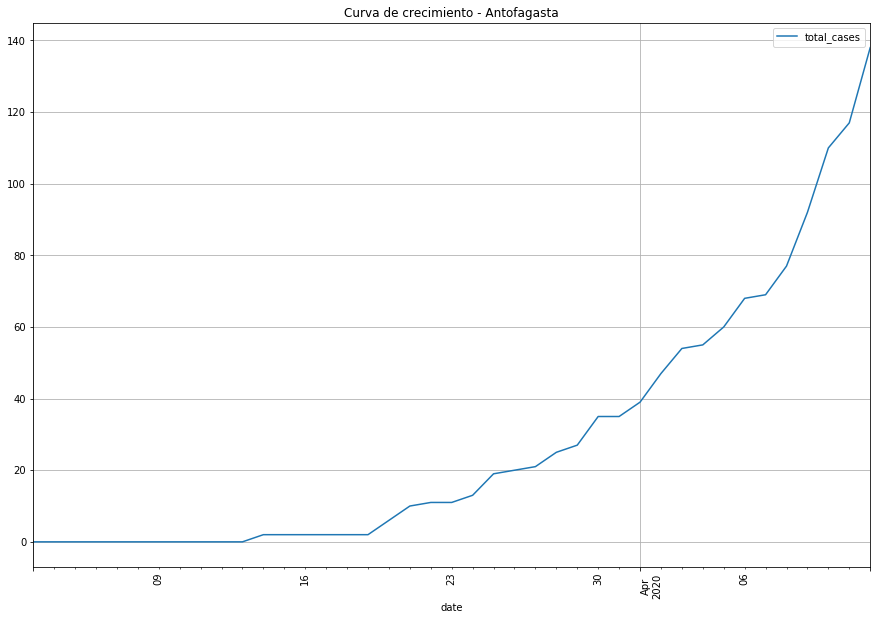

In [148]:
getGraphandList("Antofagasta")

          date location  total_cases
3   2020-03-03  Atacama            0
19  2020-03-04  Atacama            0
35  2020-03-05  Atacama            0
51  2020-03-06  Atacama            0
67  2020-03-07  Atacama            0
83  2020-03-08  Atacama            0
99  2020-03-09  Atacama            0
115 2020-03-10  Atacama            0
131 2020-03-11  Atacama            0
147 2020-03-12  Atacama            0
163 2020-03-13  Atacama            0
179 2020-03-14  Atacama            1
195 2020-03-15  Atacama            1
211 2020-03-16  Atacama            1
227 2020-03-17  Atacama            1
243 2020-03-18  Atacama            1
259 2020-03-19  Atacama            1
275 2020-03-20  Atacama            1
291 2020-03-21  Atacama            1
307 2020-03-22  Atacama            1
323 2020-03-23  Atacama            1
339 2020-03-24  Atacama            1
355 2020-03-25  Atacama            1
371 2020-03-26  Atacama            1
387 2020-03-27  Atacama            1
403 2020-03-28  Atacama            1
4

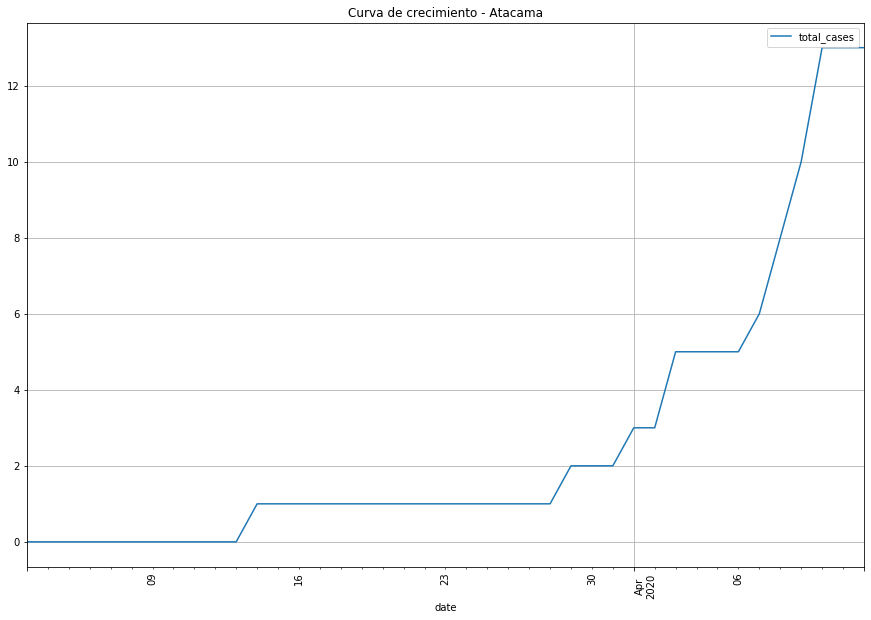

In [149]:
getGraphandList("Atacama")

          date  location  total_cases
6   2020-03-03  Coquimbo            0
22  2020-03-04  Coquimbo            0
38  2020-03-05  Coquimbo            0
54  2020-03-06  Coquimbo            0
70  2020-03-07  Coquimbo            0
86  2020-03-08  Coquimbo            0
102 2020-03-09  Coquimbo            0
118 2020-03-10  Coquimbo            0
134 2020-03-11  Coquimbo            0
150 2020-03-12  Coquimbo            0
166 2020-03-13  Coquimbo            0
182 2020-03-14  Coquimbo            0
198 2020-03-15  Coquimbo            0
214 2020-03-16  Coquimbo            0
230 2020-03-17  Coquimbo            0
246 2020-03-18  Coquimbo            0
262 2020-03-19  Coquimbo            2
278 2020-03-20  Coquimbo            3
294 2020-03-21  Coquimbo            3
310 2020-03-22  Coquimbo            5
326 2020-03-23  Coquimbo            6
342 2020-03-24  Coquimbo           11
358 2020-03-25  Coquimbo           12
374 2020-03-26  Coquimbo           13
390 2020-03-27  Coquimbo           14
406 2020-03-

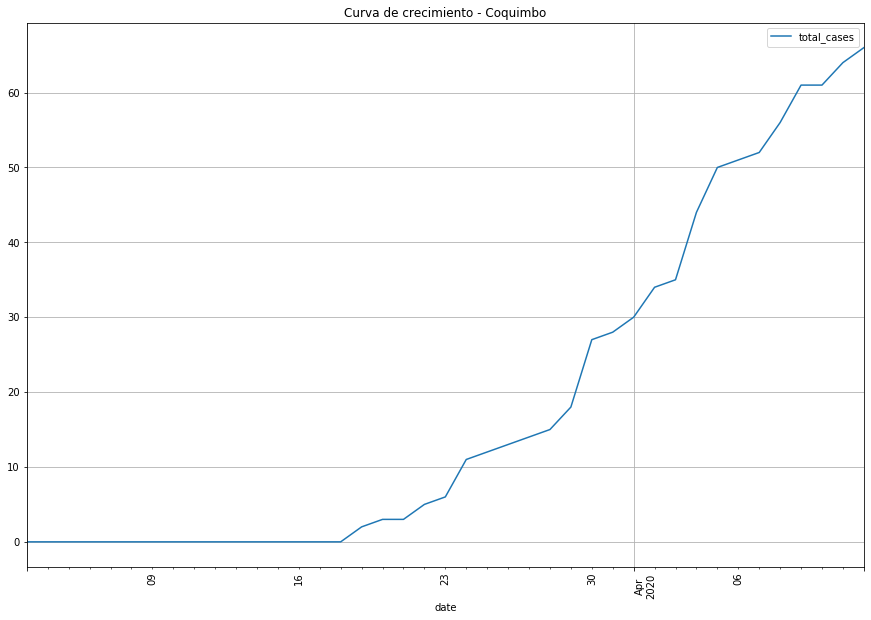

In [150]:
getGraphandList("Coquimbo")

          date    location  total_cases
14  2020-03-03  Valparaíso            0
30  2020-03-04  Valparaíso            0
46  2020-03-05  Valparaíso            0
62  2020-03-06  Valparaíso            0
78  2020-03-07  Valparaíso            0
94  2020-03-08  Valparaíso            0
110 2020-03-09  Valparaíso            0
126 2020-03-10  Valparaíso            0
142 2020-03-11  Valparaíso            0
158 2020-03-12  Valparaíso            0
174 2020-03-13  Valparaíso            0
190 2020-03-14  Valparaíso            0
206 2020-03-15  Valparaíso            0
222 2020-03-16  Valparaíso            1
238 2020-03-17  Valparaíso            1
254 2020-03-18  Valparaíso            1
270 2020-03-19  Valparaíso            4
286 2020-03-20  Valparaíso            5
302 2020-03-21  Valparaíso           13
318 2020-03-22  Valparaíso           16
334 2020-03-23  Valparaíso           19
350 2020-03-24  Valparaíso           25
366 2020-03-25  Valparaíso           32
382 2020-03-26  Valparaíso           44


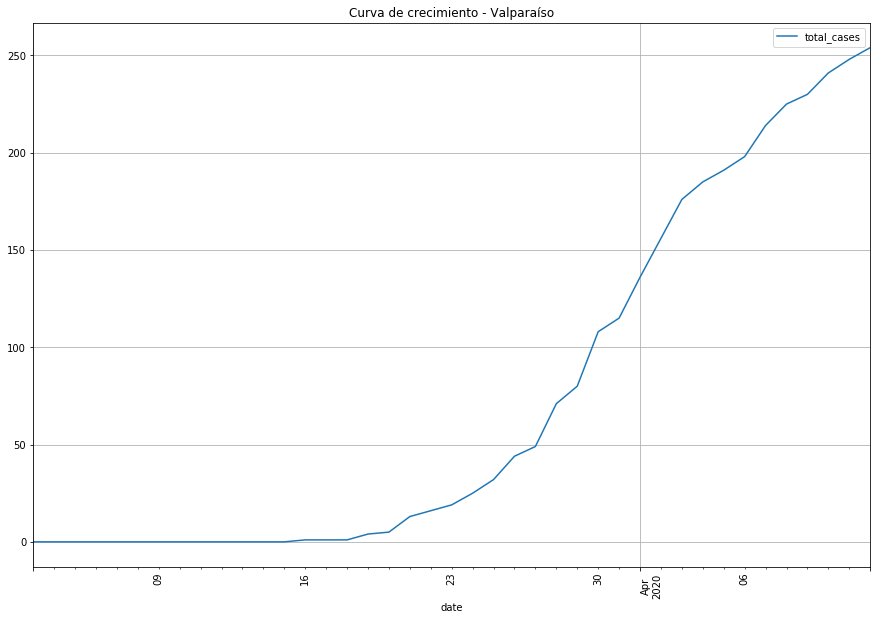

In [151]:
getGraphandList("Valparaíso")

          date       location  total_cases
11  2020-03-03  Metropolitana            0
27  2020-03-04  Metropolitana            1
43  2020-03-05  Metropolitana            2
59  2020-03-06  Metropolitana            3
75  2020-03-07  Metropolitana            4
91  2020-03-08  Metropolitana            6
107 2020-03-09  Metropolitana            7
123 2020-03-10  Metropolitana           10
139 2020-03-11  Metropolitana           14
155 2020-03-12  Metropolitana           23
171 2020-03-13  Metropolitana           29
187 2020-03-14  Metropolitana           40
203 2020-03-15  Metropolitana           54
219 2020-03-16  Metropolitana          123
235 2020-03-17  Metropolitana          152
251 2020-03-18  Metropolitana          174
267 2020-03-19  Metropolitana          247
283 2020-03-20  Metropolitana          304
299 2020-03-21  Metropolitana          359
315 2020-03-22  Metropolitana          409
331 2020-03-23  Metropolitana          459
347 2020-03-24  Metropolitana          540
363 2020-03

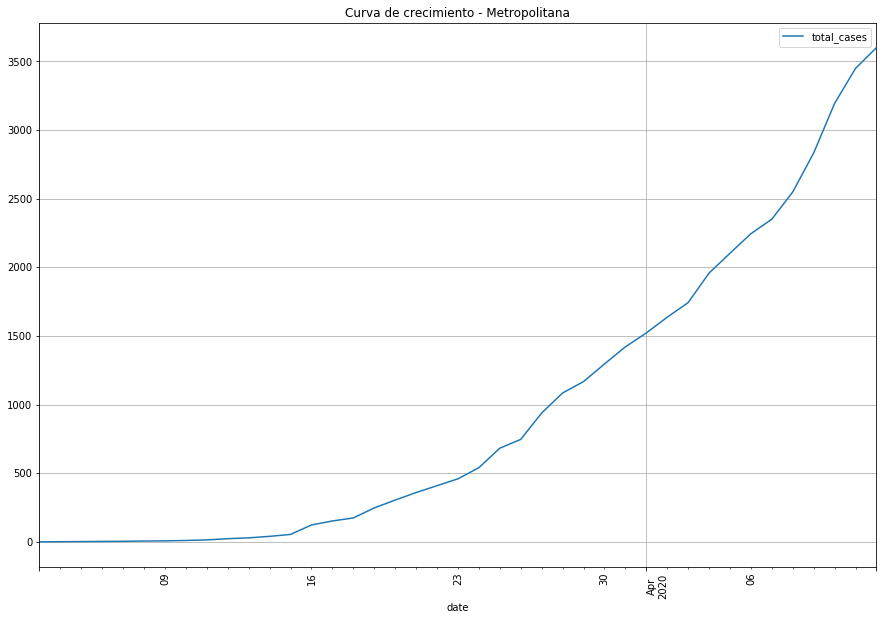

In [152]:
getGraphandList("Metropolitana")

          date   location  total_cases
12  2020-03-03  O'Higgins            0
28  2020-03-04  O'Higgins            0
44  2020-03-05  O'Higgins            0
60  2020-03-06  O'Higgins            0
76  2020-03-07  O'Higgins            0
92  2020-03-08  O'Higgins            0
108 2020-03-09  O'Higgins            0
124 2020-03-10  O'Higgins            0
140 2020-03-11  O'Higgins            0
156 2020-03-12  O'Higgins            0
172 2020-03-13  O'Higgins            0
188 2020-03-14  O'Higgins            0
204 2020-03-15  O'Higgins            0
220 2020-03-16  O'Higgins            0
236 2020-03-17  O'Higgins            0
252 2020-03-18  O'Higgins            0
268 2020-03-19  O'Higgins            2
284 2020-03-20  O'Higgins            6
300 2020-03-21  O'Higgins            7
316 2020-03-22  O'Higgins            8
332 2020-03-23  O'Higgins            8
348 2020-03-24  O'Higgins            9
364 2020-03-25  O'Higgins           11
380 2020-03-26  O'Higgins           14
396 2020-03-27  O'Higgins

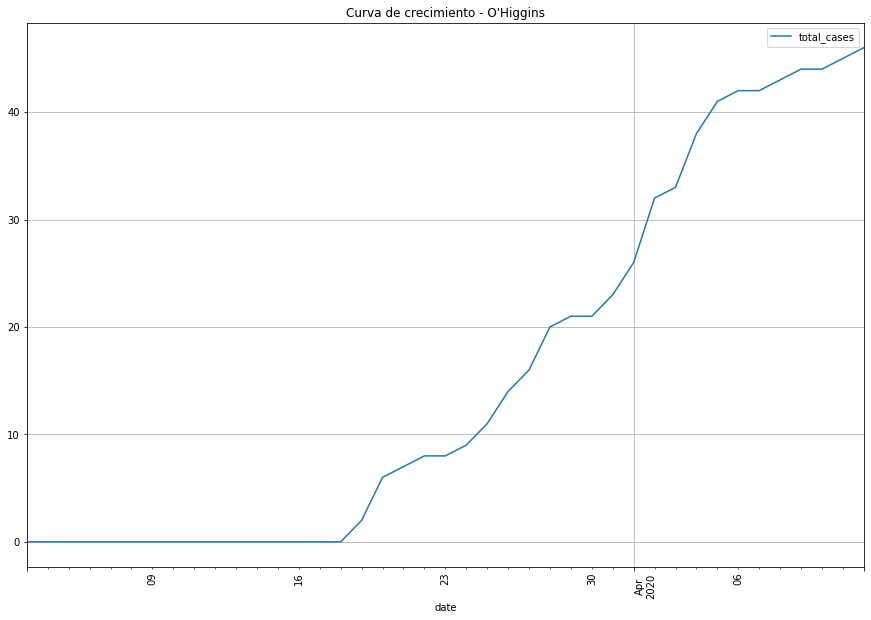

In [153]:
getGraphandList("O'Higgins")

          date location  total_cases
10  2020-03-03    Maule            1
26  2020-03-04    Maule            1
42  2020-03-05    Maule            2
58  2020-03-06    Maule            2
74  2020-03-07    Maule            2
90  2020-03-08    Maule            3
106 2020-03-09    Maule            4
122 2020-03-10    Maule            5
138 2020-03-11    Maule            7
154 2020-03-12    Maule            7
170 2020-03-13    Maule            8
186 2020-03-14    Maule            9
202 2020-03-15    Maule            9
218 2020-03-16    Maule            9
234 2020-03-17    Maule            9
250 2020-03-18    Maule           11
266 2020-03-19    Maule           14
282 2020-03-20    Maule           14
298 2020-03-21    Maule           15
314 2020-03-22    Maule           25
330 2020-03-23    Maule           28
346 2020-03-24    Maule           29
362 2020-03-25    Maule           30
378 2020-03-26    Maule           31
394 2020-03-27    Maule           32
410 2020-03-28    Maule           37
4

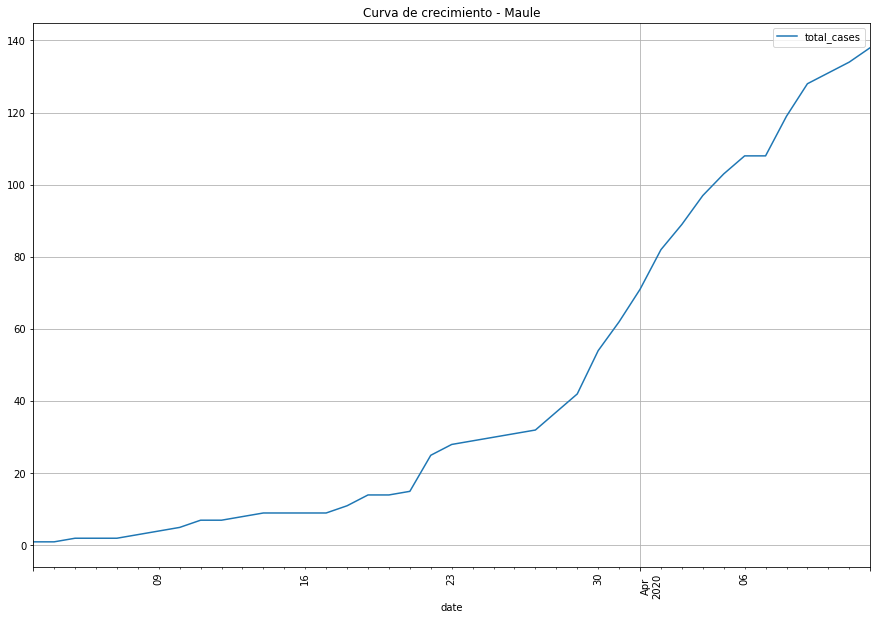

In [154]:
getGraphandList("Maule")

          date location  total_cases
15  2020-03-03    Ñuble            0
31  2020-03-04    Ñuble            0
47  2020-03-05    Ñuble            0
63  2020-03-06    Ñuble            0
79  2020-03-07    Ñuble            0
95  2020-03-08    Ñuble            0
111 2020-03-09    Ñuble            0
127 2020-03-10    Ñuble            0
143 2020-03-11    Ñuble            0
159 2020-03-12    Ñuble            1
175 2020-03-13    Ñuble            2
191 2020-03-14    Ñuble            4
207 2020-03-15    Ñuble            4
223 2020-03-16    Ñuble           12
239 2020-03-17    Ñuble           26
255 2020-03-18    Ñuble           26
271 2020-03-19    Ñuble           28
287 2020-03-20    Ñuble           44
303 2020-03-21    Ñuble           58
319 2020-03-22    Ñuble           64
335 2020-03-23    Ñuble           81
351 2020-03-24    Ñuble          105
367 2020-03-25    Ñuble          111
383 2020-03-26    Ñuble          114
399 2020-03-27    Ñuble          144
415 2020-03-28    Ñuble          172
4

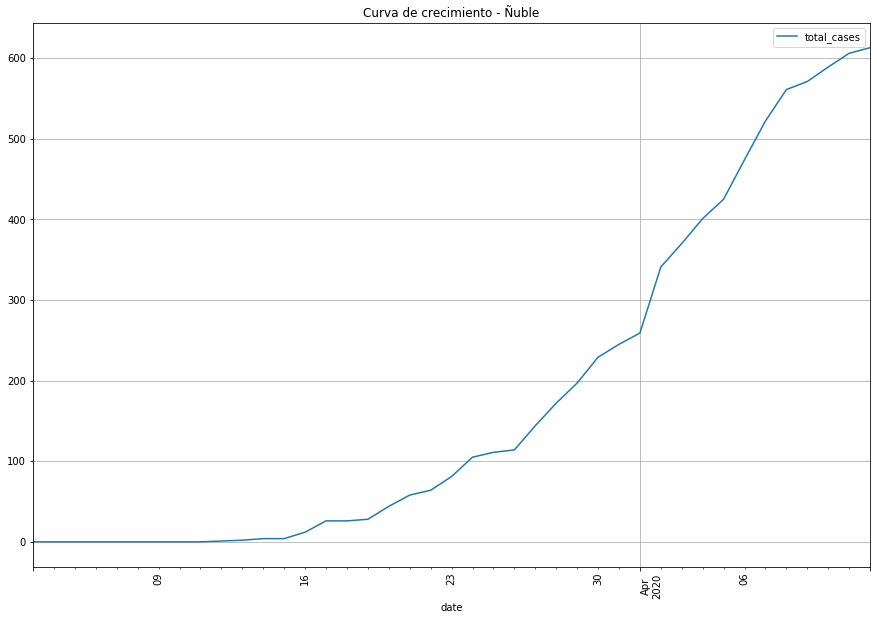

In [155]:
getGraphandList("Ñuble")

          date location  total_cases
5   2020-03-03   Biobío            0
21  2020-03-04   Biobío            0
37  2020-03-05   Biobío            0
53  2020-03-06   Biobío            0
69  2020-03-07   Biobío            0
85  2020-03-08   Biobío            0
101 2020-03-09   Biobío            1
117 2020-03-10   Biobío            1
133 2020-03-11   Biobío            1
149 2020-03-12   Biobío            1
165 2020-03-13   Biobío            3
181 2020-03-14   Biobío            3
197 2020-03-15   Biobío            3
213 2020-03-16   Biobío            4
229 2020-03-17   Biobío            4
245 2020-03-18   Biobío            7
261 2020-03-19   Biobío           14
277 2020-03-20   Biobío           19
293 2020-03-21   Biobío           30
309 2020-03-22   Biobío           35
325 2020-03-23   Biobío           46
341 2020-03-24   Biobío           73
357 2020-03-25   Biobío           95
373 2020-03-26   Biobío          109
389 2020-03-27   Biobío          135
405 2020-03-28   Biobío          151
4

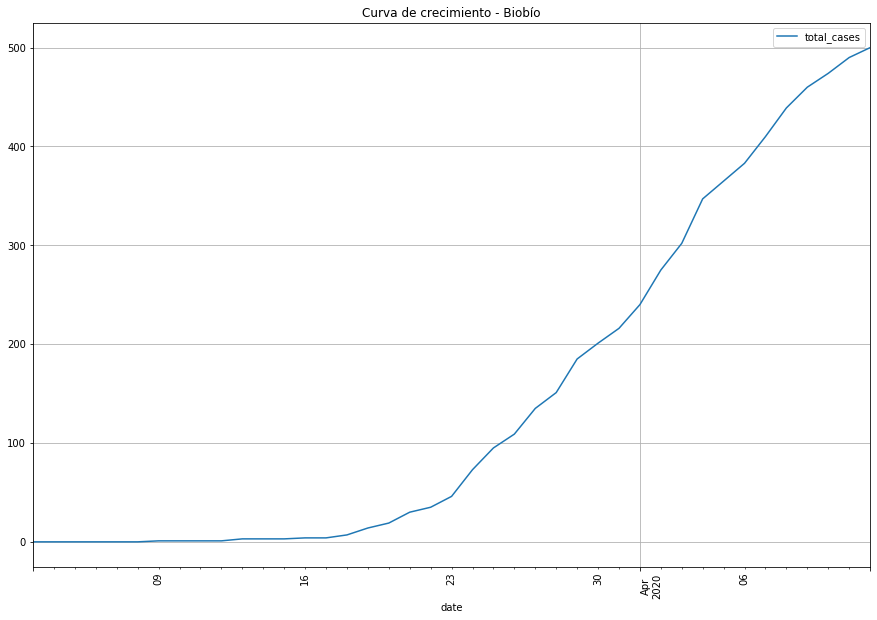

In [156]:
getGraphandList("Biobío")

          date   location  total_cases
1   2020-03-03  Araucanía            0
17  2020-03-04  Araucanía            0
33  2020-03-05  Araucanía            0
49  2020-03-06  Araucanía            0
65  2020-03-07  Araucanía            0
81  2020-03-08  Araucanía            0
97  2020-03-09  Araucanía            0
113 2020-03-10  Araucanía            0
129 2020-03-11  Araucanía            0
145 2020-03-12  Araucanía            0
161 2020-03-13  Araucanía            0
177 2020-03-14  Araucanía            0
193 2020-03-15  Araucanía            0
209 2020-03-16  Araucanía            1
225 2020-03-17  Araucanía            1
241 2020-03-18  Araucanía            4
257 2020-03-19  Araucanía            7
273 2020-03-20  Araucanía            9
289 2020-03-21  Araucanía           15
305 2020-03-22  Araucanía           27
321 2020-03-23  Araucanía           40
337 2020-03-24  Araucanía           59
353 2020-03-25  Araucanía           74
369 2020-03-26  Araucanía          111
385 2020-03-27  Araucanía

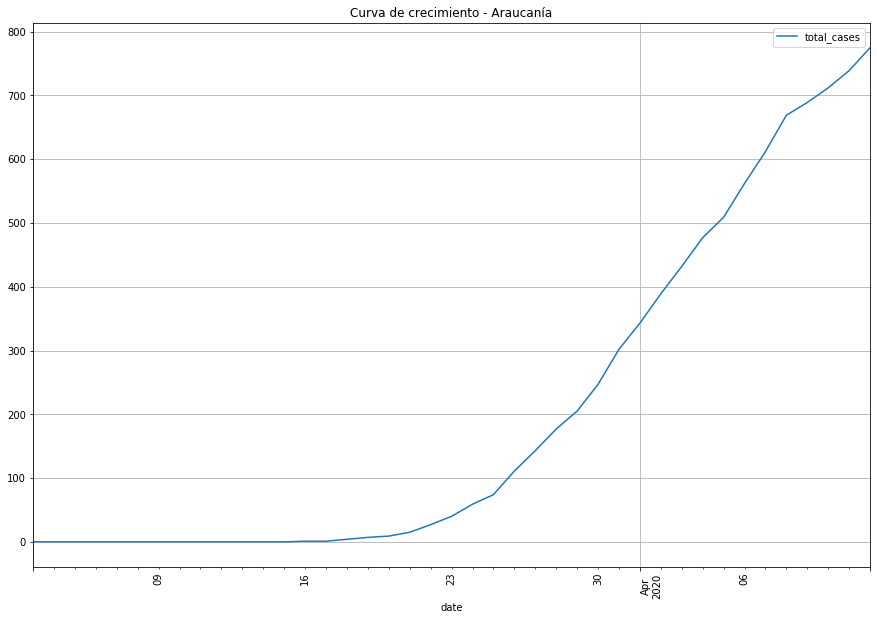

In [157]:
getGraphandList("Araucanía")

          date  location  total_cases
8   2020-03-03  Los Ríos            0
24  2020-03-04  Los Ríos            0
40  2020-03-05  Los Ríos            0
56  2020-03-06  Los Ríos            0
72  2020-03-07  Los Ríos            0
88  2020-03-08  Los Ríos            0
104 2020-03-09  Los Ríos            0
120 2020-03-10  Los Ríos            0
136 2020-03-11  Los Ríos            0
152 2020-03-12  Los Ríos            0
168 2020-03-13  Los Ríos            0
184 2020-03-14  Los Ríos            0
200 2020-03-15  Los Ríos            0
216 2020-03-16  Los Ríos            1
232 2020-03-17  Los Ríos            1
248 2020-03-18  Los Ríos            1
264 2020-03-19  Los Ríos            1
280 2020-03-20  Los Ríos            1
296 2020-03-21  Los Ríos            1
312 2020-03-22  Los Ríos            1
328 2020-03-23  Los Ríos            4
344 2020-03-24  Los Ríos            6
360 2020-03-25  Los Ríos           11
376 2020-03-26  Los Ríos           14
392 2020-03-27  Los Ríos           22
408 2020-03-

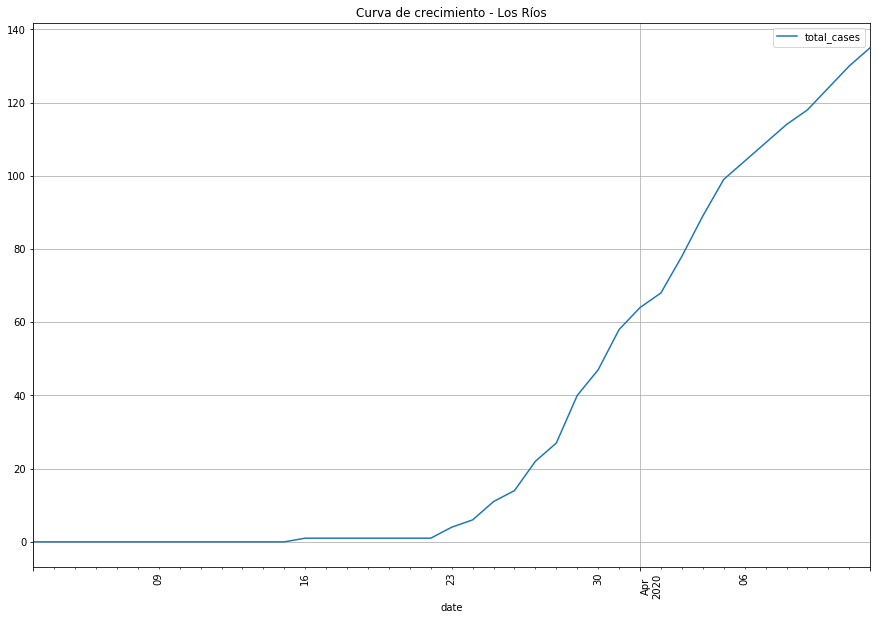

In [158]:
getGraphandList("Los Ríos")

          date   location  total_cases
7   2020-03-03  Los Lagos            0
23  2020-03-04  Los Lagos            0
39  2020-03-05  Los Lagos            0
55  2020-03-06  Los Lagos            0
71  2020-03-07  Los Lagos            1
87  2020-03-08  Los Lagos            1
103 2020-03-09  Los Lagos            1
119 2020-03-10  Los Lagos            1
135 2020-03-11  Los Lagos            1
151 2020-03-12  Los Lagos            1
167 2020-03-13  Los Lagos            1
183 2020-03-14  Los Lagos            1
199 2020-03-15  Los Lagos            1
215 2020-03-16  Los Lagos            1
231 2020-03-17  Los Lagos            1
247 2020-03-18  Los Lagos            8
263 2020-03-19  Los Lagos           16
279 2020-03-20  Los Lagos           18
295 2020-03-21  Los Lagos           20
311 2020-03-22  Los Lagos           23
327 2020-03-23  Los Lagos           33
343 2020-03-24  Los Lagos           36
359 2020-03-25  Los Lagos           44
375 2020-03-26  Los Lagos           60
391 2020-03-27  Los Lagos

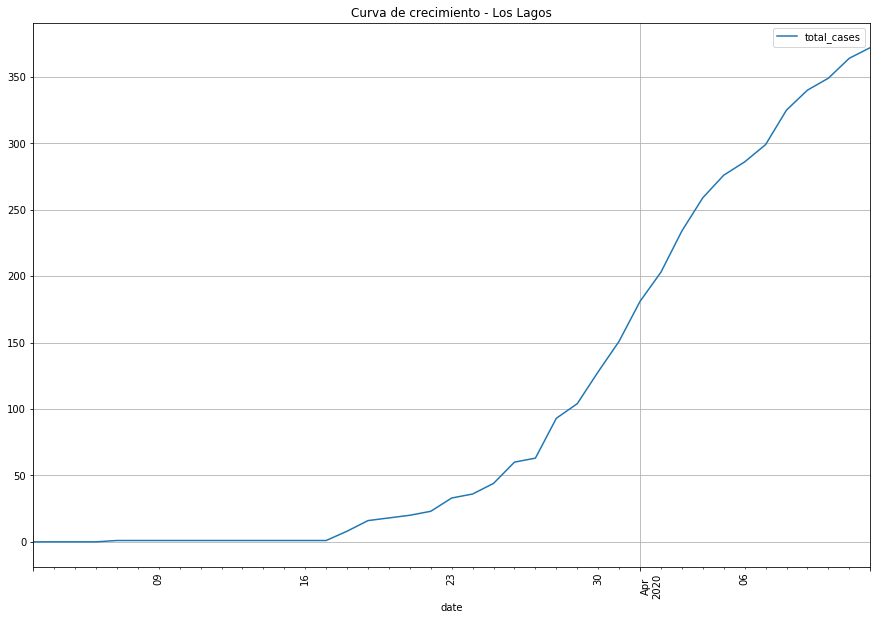

In [159]:
getGraphandList("Los Lagos")

          date location  total_cases
4   2020-03-03    Aysén            0
20  2020-03-04    Aysén            0
36  2020-03-05    Aysén            0
52  2020-03-06    Aysén            0
68  2020-03-07    Aysén            0
84  2020-03-08    Aysén            0
100 2020-03-09    Aysén            0
116 2020-03-10    Aysén            0
132 2020-03-11    Aysén            0
148 2020-03-12    Aysén            0
164 2020-03-13    Aysén            0
180 2020-03-14    Aysén            1
196 2020-03-15    Aysén            1
212 2020-03-16    Aysén            1
228 2020-03-17    Aysén            1
244 2020-03-18    Aysén            1
260 2020-03-19    Aysén            1
276 2020-03-20    Aysén            1
292 2020-03-21    Aysén            1
308 2020-03-22    Aysén            1
324 2020-03-23    Aysén            1
340 2020-03-24    Aysén            1
356 2020-03-25    Aysén            1
372 2020-03-26    Aysén            2
388 2020-03-27    Aysén            2
404 2020-03-28    Aysén            2
4

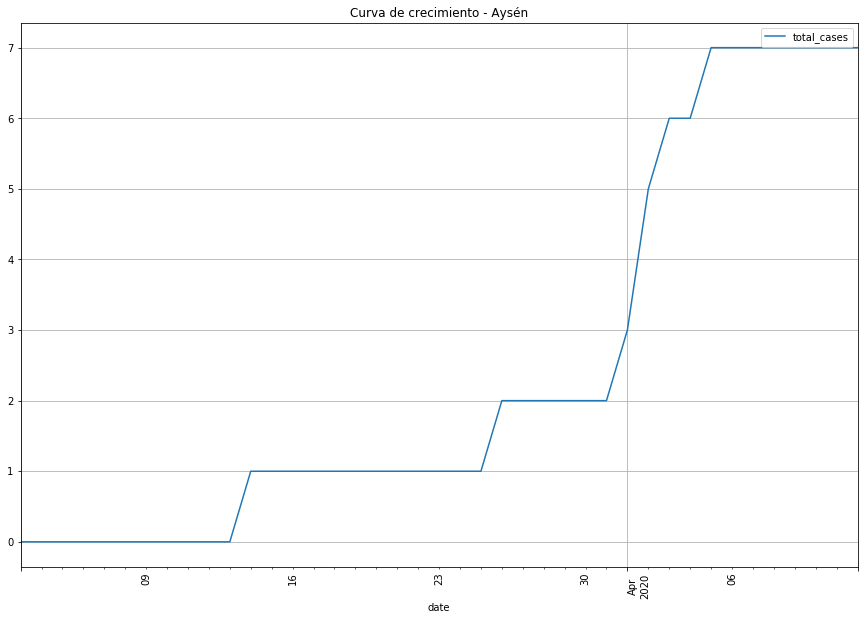

In [160]:
getGraphandList("Aysén")

          date    location  total_cases
9   2020-03-03  Magallanes            0
25  2020-03-04  Magallanes            0
41  2020-03-05  Magallanes            0
57  2020-03-06  Magallanes            0
73  2020-03-07  Magallanes            0
89  2020-03-08  Magallanes            0
105 2020-03-09  Magallanes            0
121 2020-03-10  Magallanes            0
137 2020-03-11  Magallanes            0
153 2020-03-12  Magallanes            0
169 2020-03-13  Magallanes            0
185 2020-03-14  Magallanes            0
201 2020-03-15  Magallanes            0
217 2020-03-16  Magallanes            0
233 2020-03-17  Magallanes            2
249 2020-03-18  Magallanes            2
265 2020-03-19  Magallanes            2
281 2020-03-20  Magallanes            2
297 2020-03-21  Magallanes            3
313 2020-03-22  Magallanes            4
329 2020-03-23  Magallanes            6
345 2020-03-24  Magallanes            8
361 2020-03-25  Magallanes           13
377 2020-03-26  Magallanes           19


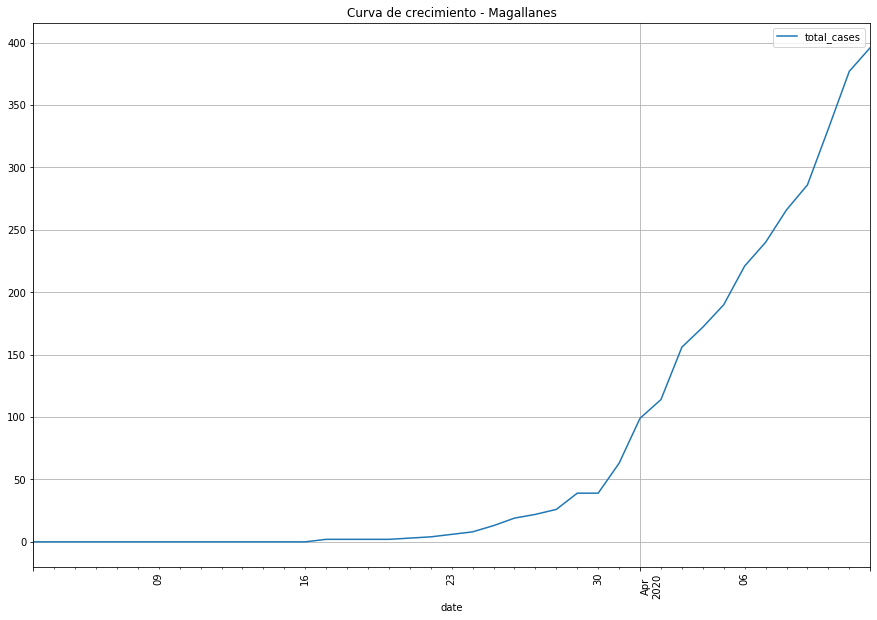

In [161]:
getGraphandList("Magallanes")

In [195]:
colors = ['#f15656', '#f18e56', '#f1c956', '#bdf156', '#74f367', '#67f3b3', '#67e6f3', '#67a9f3', '#6772f3', '#9167f3', '#de67f3', '#f367c9', '#f36789', '#1c306a', "#1c6a20", "#2c6a40"]
def getGraphandListall():
    icolor = 0
    name_regiones = avance_por_fecha_region["location"].unique()
    
    for nregion in name_regiones:
        region           = avance_por_fecha_region.loc[avance_por_fecha_region['location'] == nregion]
        color            = colors[icolor]
        plt.plot(region["date"],region["total_cases"], color)
        icolor += 1
        
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de casos')
    plt.title('Curva de crecimiento por región')
    plt.legend(name_regiones, loc = 'best', bbox_to_anchor=(1.0, 1.0))
    plt.show()

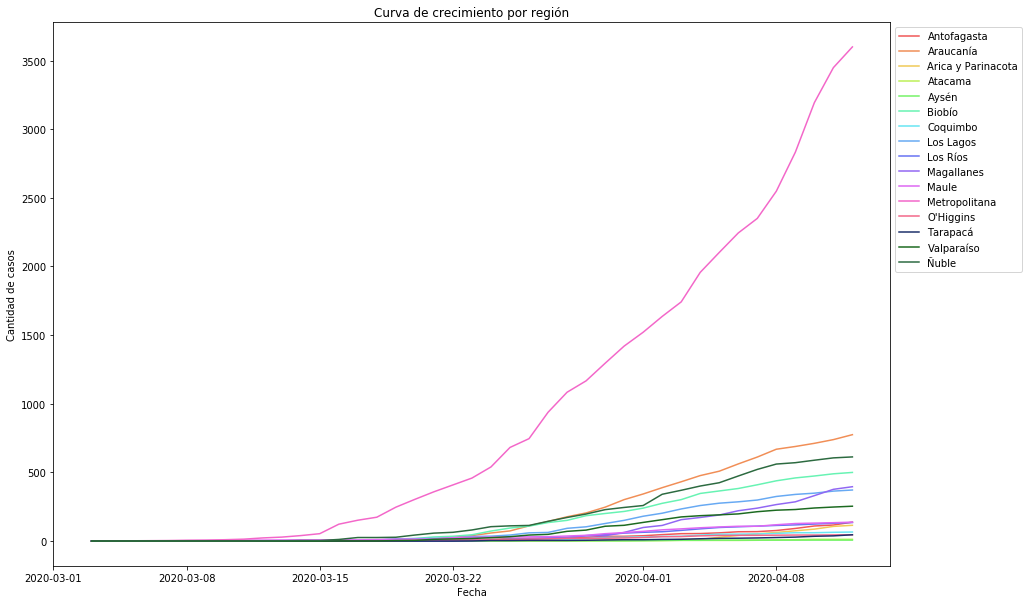

In [196]:
getGraphandListall()